## Prepare Data

We the following categorical data derived from the Möbius' dataset on Kaggle will help to discover the patterns:

- activity level/ intensities
- number steps
- calories
- sleep log
- heart rate log
- METs value (Metabolic Equivalents)

The data is:

- (R)eliable - it data does not specifiy the gender, age group or the lifestyle of the participants which could possibly lead to bias
- (O)riginal - yes, the data is original
- (C)omprehensive - the data included basic smart device features
- (C)urrent - a more updated data would be ideal since the dataset was updated an year ago and contains data collected till the year 2016
- (C)ited - yes, the data is cited

In [ ]:
#install packages and libraries
install.packages("tidyverse")
library("tidyverse")
install.packages("lubridate")
library("lubridate")
install.packages("skimr")
library("skimr")
install.packages("janitor")
library("janitor")
install.packages("dplyr")
library("dplyr")
install.packages("readr")
library("readr")

Let's now use the following datasets to see how people used these features on their Smart devices:

- Daily activity - dailyActivity_merged.csv
- Sleeping patterns - minuteSleep_merged.csv
- Heart rate - heartrate_seconds_merged.csv
- metabolic equivalents recorded - minuteMETsNarrow_merged.csv (the only dataset on METs)

In [ ]:
#load the datasets
daily_activity <- read.csv("cloud/project/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_sleep <-read.csv("cloud/project/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
heartrate <- read.csv("cloud/project/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
mets_mins_raw <- read.csv("cloud/project/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")

# Go through the data in datasets
glimpse(daily_activity)
summary(daily_activity)

glimpse(daily_sleep)
summary(daily_sleep)

glimpse(heartrate)
summary(heartrate)

glimpse(mets_mins_raw)
summary(mets_mins_raw)

In [ ]:
> glimpse(daily_activity_df)
Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/2016", "4/16/2016", "4/17/2016…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019, 15506, 10544, 9819, 12764, 1…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.88, 6.68, 6.34, 8.13, 9.04, 6.4…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.88, 6.68, 6.34, 8.13, 9.04, 6.4…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.53, 1.96, 1.34, 4.76, 2.81, 2.9…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.32, 0.48, 0.35, 1.12, 0.87, 0.2…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.03, 4.24, 4.65, 2.24, 5.36, 3.2…
$ SedentaryActiveDistance  <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.0…
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 41, 39, 73, 31, 78, 48, 16, 52,…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21, 5, 14, 23, 11, 28, 12, 34, 3…
$ LightlyActiveMinutes     <dbl> 328, 217, 181, 209, 221, 164, 233, 264, 205, 211, 130, 262, 238, 216, 279, …
$ SedentaryMinutes         <dbl> 728, 776, 1218, 726, 773, 539, 1149, 775, 818, 838, 1217, 732, 709, 814, 83…
$ Calories                 <dbl> 1985, 1797, 1776, 1745, 1863, 1728, 1921, 2035, 1786, 1775, 1827, 1949, 178…

In [ ]:
> glimpse(daily_sleep_df)
Rows: 188,521
Columns: 4
$ Id    <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, …
$ date  <chr> "4/12/2016 2:47:30 AM", "4/12/2016 2:48:30 AM", "4/12/2016 2:49:30 AM", "4/12/2016 2:50:30 AM", "4/12/2016 2…
$ value <dbl> 3, 2, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ logId <dbl> 11380564589, 11380564589, 11380564589, 11380564589, 11380564589, 11380564589, 11380564589, 11380564589, 1138…

In [ ]:
> glimpse(daily_calorie_df)
Rows: 22,099
Columns: 3
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ ActivityHour <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/12/2016 2:00:00 AM", "4/12/2016 3:00:00 AM", "4/1…
$ Calories     <dbl> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73, 66, 110, 151, 76, 83, 124, 104, 132, 100, 65, 81…

In [ ]:
> glimpse(daily_hearrate_df)
Rows: 2,483,658
Columns: 3
$ Id    <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 2022484408, 2022484408, 2022484408, 2022484408, 2022484408, …
$ Time  <chr> "4/12/2016 7:21:00 AM", "4/12/2016 7:21:05 AM", "4/12/2016 7:21:10 AM", "4/12/2016 7:21:20 AM", "4/12/2016 7…
$ Value <dbl> 97, 102, 105, 103, 101, 95, 91, 93, 94, 93, 92, 89, 83, 61, 60, 61, 61, 57, 54, 55, 58, 60, 59, 57, 56, 58, …

In [ ]:
> glimpse(mets_min_df)
Rows: 1,325,580
Columns: 3
$ Id             <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ ActivityMinute <chr> "4/12/2016 12:00:00 AM", "4/12/2016 12:01:00 AM", "4/12/2016 12:02:00 AM", "4/12/2016 12:03:00 AM",…
$ METs           <dbl> 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 10, 10, 12, 10, 12, 10, 10, 10, 12, 12, 12, 12, 12,…

From both the `glimpse()`, it is clear that the dimensions of datasets are different and number of rows are different. Now 
- we have to ensure if all individuals record everything daily? 
- What do they log mainly? so we can find out what features are mostly used?

We have the "daily_activity_df"data frame that is showing detailes of daily activity, total steps, and calories. This is a good start to understand. 

Let's find out which activities are tracked by users everyday using Smartdevices.


## Data Processing


### Daily Activity

In [ ]:
# Check for duplicated rows
daily_activity_df[duplicated(daily_activity_df),]
colSums(is.na(daily_activity_df))

In [ ]:
> daily_activity_df[duplicated(daily_activity_df),]
# A tibble: 0 × 15
# … with 15 variables: Id <dbl>, ActivityDate <chr>, TotalSteps <dbl>, TotalDistance <dbl>, TrackerDistance <dbl>,
#   LoggedActivitiesDistance <dbl>, VeryActiveDistance <dbl>, ModeratelyActiveDistance <dbl>, LightActiveDistance <dbl>,
#   SedentaryActiveDistance <dbl>, VeryActiveMinutes <dbl>, FairlyActiveMinutes <dbl>, LightlyActiveMinutes <dbl>,
#   SedentaryMinutes <dbl>, Calories <dbl>
> colSums(is.na(daily_activity_df))
                      Id             ActivityDate               TotalSteps            TotalDistance 
                       0                        0                        0                        0 
         TrackerDistance LoggedActivitiesDistance       VeryActiveDistance ModeratelyActiveDistance 
                       0                        0                        0                        0 
     LightActiveDistance  SedentaryActiveDistance        VeryActiveMinutes      FairlyActiveMinutes 
                       0                        0                        0                        0 
    LightlyActiveMinutes         SedentaryMinutes                 Calories 
                       0                        0                        0 

In [ ]:
daily_activity <- daily_activity_df %>%
  clean_names() %>%
  rename(moderately_active_minutes = fairly_active_minutes)%>%
  rename(date = activity_date) %>% 
  mutate(date = mdy(date))

## Sleep Activity

In [ ]:
# Sleep activity cleaning
> daily_sleep_df[duplicated(daily_sleep_df),]
# A tibble: 543 × 4
           Id date                value       logId
        <dbl> <chr>               <dbl>       <dbl>
 1 4702921684 5/6/2016 9:10:00 PM     3 11573168523
 2 4702921684 5/6/2016 9:11:00 PM     3 11573168523
 3 4702921684 5/6/2016 9:12:00 PM     2 11573168523
 4 4702921684 5/6/2016 9:13:00 PM     1 11573168523
 5 4702921684 5/6/2016 9:14:00 PM     1 11573168523
 6 4702921684 5/6/2016 9:15:00 PM     1 11573168523
 7 4702921684 5/6/2016 9:16:00 PM     1 11573168523
 8 4702921684 5/6/2016 9:17:00 PM     1 11573168523
 9 4702921684 5/6/2016 9:18:00 PM     1 11573168523
10 4702921684 5/6/2016 9:19:00 PM     1 11573168523
# … with 533 more rows
> colSums(is.na(daily_sleep_df))
   Id  date value logId 
    0     0     0     0 

In [ ]:
> separate(sleep, date, into = c("new_date","time"), sep = " ")
# A tibble: 188,521 × 5
           id new_date  time    value      log_id
        <dbl> <chr>     <chr>   <dbl>       <dbl>
 1 1503960366 4/12/2016 2:47:30     3 11380564589
 2 1503960366 4/12/2016 2:48:30     2 11380564589
 3 1503960366 4/12/2016 2:49:30     1 11380564589
 4 1503960366 4/12/2016 2:50:30     1 11380564589
 5 1503960366 4/12/2016 2:51:30     1 11380564589
 6 1503960366 4/12/2016 2:52:30     1 11380564589
 7 1503960366 4/12/2016 2:53:30     1 11380564589
 8 1503960366 4/12/2016 2:54:30     2 11380564589
 9 1503960366 4/12/2016 2:55:30     2 11380564589
10 1503960366 4/12/2016 2:56:30     2 11380564589

In [ ]:
#clean and organise data
sleep <- daily_sleep %>%
  clean_names() %>%
  separate(sleep, date, into = c("new_date","time"), sep = " ") %>%
  mutate(date = mdy(date)) %>%
  #Exclude time as it's not needed for analysis
  select(-time)

## Heart rate

In [ ]:
#checking for any duplicated rows and missing value
heartrate_df[duplicated(heartrate_df),]
colSums(is.na(heartrate_df))
#Result
A data.frame: 0 × 3
Id	Time	Value
<dbl>	<chr>	<int>
Id0Time0Value0

#clean and organise the data
heartrate <- heartrate_df %>%
  clean_names() %>%
  rename(date_time = time) %>% 
  mutate(date_time = mdy_hms(date_time))

## METs data

In [ ]:
#checking for any duplicated rows -- result in none
mets_mins_df[duplicated(mets_mins_df),]
colSums(is.na(mets_mins_df))

# result
A data.frame: 0 × 3
Id ActivityMinute METs
<dbl> <chr> <int>
Id0ActivityMinute0METs0

#clean and organise data
mets_mins <- mets_mins_df %>%
  clean_names() %>% 
  rename(date_time = activity_minute) %>% 
  rename(mets_value = me_ts) %>% 
  mutate(date_time = mdy_hms(date_time))

## Analyse Data

In [ ]:
# What feature do people use the most and least?

n_distinct(daily_activity$id)
n_distinct(sleep$id)
n_distinct(heartrate$id)
n_distinct(mets_mins$id)

# Result

> n_distinct(daily_activity$id)
[1] 33
> n_distinct(sleep$id)
[1] 24
> n_distinct(heartrate$id)
[1] 14
> n_distinct(mets_mins$id)
[1] 33

### how often do they use these features within the month (i.e. the period of time these data were collected)?

In [ ]:
#for daily activity merged
activity_n_days <- daily_activity %>% 
  group_by(id) %>% 
  summarise(n_active=n_distinct(`date`)) ##see if this work
#for daily sleep
sleep_days <- sleep %>% 
  group_by(id) %>% 
  summarise(n_sleep=n_distinct(`date`))
#for heart rate record
heartrate_days <- heartrate %>% 
  dplyr::group_by(id) %>% 
  summarise(n_heartrate=n_distinct(date(date_time)))
        
#perform left join to get total number of days for each feature
recorded_days <- activity_n_days %>% 
  left_join(sleep_days, by=c("id"="id")) %>% 
              left_join(heartrate_days, by=c("id"="id")) %>%
  left_join(weight_log_days, by=c("id"="id"))
#inspecting the dataframe created
head(recorded_days)

# Who tracks what?

By now, we can tell that active minutes/ levels, distance traveled, number of steps and calories burned are most used features. There are a total of 33 records indicating the total number of individuals these data collected from, and not all of them were active users of these existing features. Let's look into this!

In [ ]:
A tibble: 6 × 5
id	n_active	n_sleep	n_heartrate	n_weight
<dbl>	<int>	<int>	<int>	<int>
1503960366	31	25	NA	2
1624580081	31	NA	NA	NA
1644430081	30	4	NA	NA
1844505072	31	3	NA	NA
1927972279	31	5	NA	1
2022484408	31	NA	31	NA


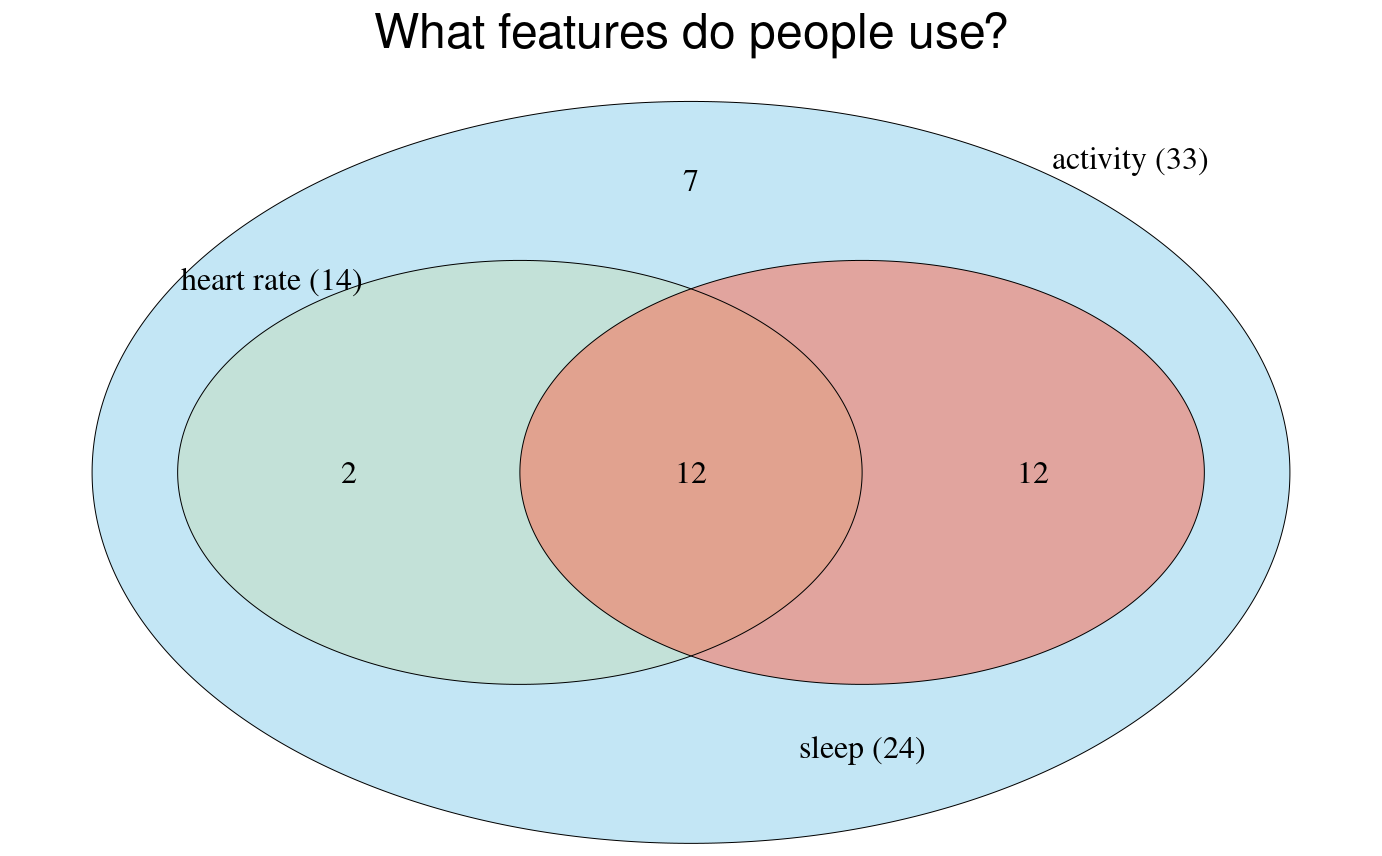

In [ ]:
#install and load Venn diagram package
install.packages("VennDiagram")
library(VennDiagram)

# create list of unique ids
activity_unique_id <- unique(daily_activity$id)
sleep_unique_id <- unique(sleep$id)
heartrate_unique_id <-unique(heartrate$id)

# combine the lists of unique id to create Venn diagram
options(repr.plot.width = 8, repr.plot.height = 8)
x <- list(activity_unique_id, sleep_unique_id, heartrate_unique_id)
venn <- venn.diagram(x,
                     category.names = c("activity (33)", "sleep (24)", "heart rate (14)"),
                     filename = NULL,
             main="What features do people use?", main.fontfamily = "sans",
             main.cex = 2.5, margin=0.05,
             lwd = 0.5, fill = c("skyblue", "tomato", "lightgoldenrod1"),
             cex = 1.5, fontface = "bold", fontfamily = "sans", 
             cat.cex = 1.5, cat.fontface = "bold", cat.fontfamily = "sans",
             cat.default.pos= "outer")
grid.newpage()
grid.draw(venn)


## Findings


**sleep monitoring**

50% of the participants recorded more than 21 days of usage

**heart rate monitoring**
more than % of the participants recored more than 21 days of usage
individuals who used less than 10 days were not more than 10%

**Daily activity**

All 33 memebers have recorded activity.

### Recommendations

**Sleep Monitoring**
to remind users about bed time
 stress managing measures
to ensure that the smart device ergonomically fits users to put on during their sleep (extra survey needed)

**Heart Rate Monitoring**
Default setting with daily active minutes, how it changes with hormonal cycle